## 1. Linear Regression with Normal equation

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
from sklearn.datasets import load_boston
boston = load_boston()

In [60]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [61]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [62]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [63]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [64]:
X = df.values
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [65]:
y = boston.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [66]:
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept=True)
lr_ne

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
X_train, X_test, y_train, y_test

(array([[1.02330e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         3.79700e+02, 1.80300e+01],
        [6.71910e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
         3.76880e+02, 1.48100e+01],
        [1.44550e-01, 1.25000e+01, 7.87000e+00, ..., 1.52000e+01,
         3.96900e+02, 1.91500e+01],
        ...,
        [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
         3.90940e+02, 5.99000e+00],
        [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
         1.09850e+02, 2.32700e+01],
        [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
         7.08000e+01, 1.06300e+01]]),
 array([[9.17800e-02, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
         3.95500e+02, 9.04000e+00],
        [5.64400e-02, 4.00000e+01, 6.41000e+00, ..., 1.76000e+01,
         3.96900e+02, 3.53000e+00],
        [1.05740e-01, 0.00000e+00, 2.77400e+01, ..., 2.01000e+01,
         3.90110e+02, 1.80700e+01],
        ...,
        [7.61620e-01, 2.00000e+01, 3.97000e+00, ..., 1

In [14]:
lr_ne.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_hat = lr_ne.predict(X_test)
y_true = y_test

In [18]:
rmse = np.sqrt((((y_hat-y_true)**2).sum()/len(y_true)))
rmse

4.55236459846306

In [19]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_hat,y_true)
mse

20.72402343733974

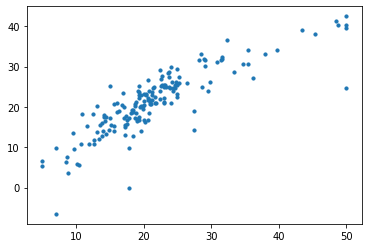

In [20]:
plt.scatter(y_true, y_hat, s=10)
plt.show()

In [21]:
lr_ne.coef_

array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
       -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
        2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
       -5.47566338e-01])

## 2. Linear Regression with SGD 
설정해줘야할것이 많음

In [23]:
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

In [25]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [29]:
lr_SGD.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [31]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [33]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat-y_true)**2).sum()/len(y_true)))
mse, rmse

(5.20401279677406e+28, 228123054441546.1)

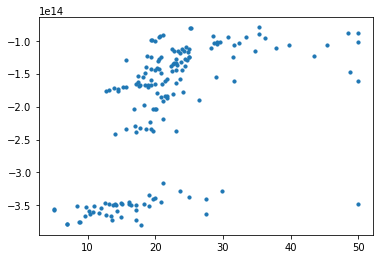

In [35]:
plt.scatter(y_true,y_hat,s=10)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.33,random_state=42)

In [37]:
lr_SGD.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [38]:
y_hat = lr_SGD.predict(X_test)
y_true = y_test

In [39]:
mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
mse, rmse

(21.26393246519977, 4.611283169053899)

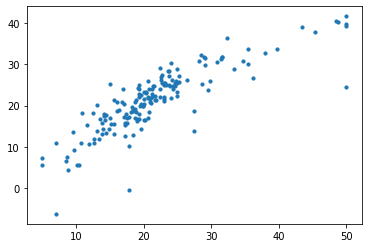

In [40]:
plt.scatter(y_true,y_hat,s=10)

## 3. Linear Regression with Ridge & Lasso regression

In [42]:
from sklearn.linear_model import Lasso, Ridge

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [51]:
ridge = Ridge(fit_intercept=True,alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [52]:
y_hat = ridge.predict(X_test)
y_true = y_test
mse = sklearn.metrics.mean_squared_error(y_hat,y_true)
rmse = np.sqrt((((y_hat-y_true)**2).sum()/len(y_true)))
mse, rmse

(20.967776607137985, 4.579058484791168)

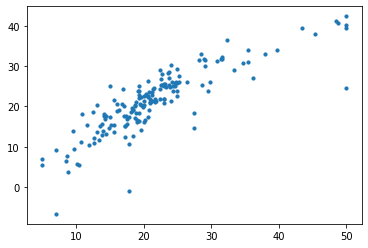

In [53]:
plt.scatter(y_true,y_hat,s=10)

In [54]:
lasso = Lasso(fit_intercept=True, alpha=0.5)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
y_hat = ridge.predict(X_test)
y_true = y_test
mse = sklearn.metrics.mean_squared_error(y_hat,y_true)
rmse = np.sqrt((((y_hat-y_true)**2).sum()/len(y_true)))
mse, rmse

(20.967776607137985, 4.579058484791168)

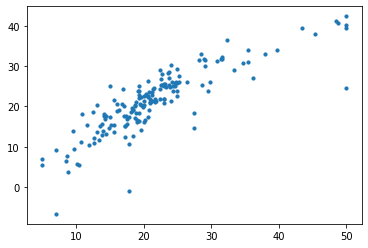

In [56]:
plt.scatter(y_true,y_hat,s=10)